In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
import altair as alt

# read from a csv file into a pd dataframe
df_ranking = pd.read_csv('~/Downloads/bi_ranking.csv', low_memory=False)
# the companias string 
df_ids = pd.read_csv('~/Downloads/bi_compania.csv', low_memory=False)

In [107]:
# get the anio with 2023
df_ranking = df_ranking[df_ranking['anio'] == 2023]

# print all the columns
#print(df_ranking.columns)

# read from d
#print(df_ranking['ranking'].value_counts())

# print the total number of rows
#print(df_ranking.shape[0])

print(df_ids.columns)

# match all of the expedientes in the df_ids with the expedientes in the df_ranking 
df = pd.merge(df_ranking, df_ids, on='expediente', how='inner')

df.head()


Index(['expediente', 'ruc', 'nombre', 'tipo', 'pro_codigo', 'provincia'], dtype='object')


,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos,ruc,nombre,tipo,pro_codigo,provincia
0,2023,384,1.0,1,2341449.0,2.483015e+09,2.564376e+09,1.785967e+09,2.093388e+08,47338195.86,...,4303663.96,1.817218e+09,6.154957e+07,0.00,4.195166e+08,1790016919001,CORPORACION FAVORITA C.A.,ANÓNIMA ...,17,PICHINCHA ...
1,2023,6796,2.0,0,2276853.0,1.155606e+09,2.070951e+09,1.558133e+09,4.464486e+08,93414106.46,...,233443.95,4.435519e+08,2.759294e+06,0.00,1.843988e+08,0190168018001,ECUACORRIENTE S.A.,ANÓNIMA ...,19,ZAMORA CHINCHIPE ...
2,2023,22576,3.0,0,2345262.0,1.433013e+09,1.791278e+09,1.050790e+09,9.829369e+07,0.00,...,0.00,1.239676e+09,1.280327e+08,4665358.57,8.590658e+07,0991257721001,INDUSTRIAL PESQUERA SANTA PRISCILA S.A.,ANÓNIMA ...,9,GUAYAS ...
3,2023,705547,4.0,0,2289327.0,8.391012e+08,1.571091e+09,1.274037e+09,2.707667e+08,68142661.28,...,0.00,0.000000e+00,0.000000e+00,0.00,5.205521e+08,1792634318001,SHAYA ECUADOR S.A.,ANÓNIMA ...,17,PICHINCHA ...
4,2023,93144,5.0,0,2260606.0,9.101614e+08,1.529595e+09,8.168620e+08,2.460363e+08,44766875.58,...,91.00,4.271049e+08,0.000000e+00,0.00,2.110597e+08,1791840712001,AURELIAN ECUADOR S.A,ANÓNIMA ...,19,ZAMORA CHINCHIPE ...


small: 134368
medium: 17162
large: 481


([<matplotlib.patches.Wedge at 0x7fdd5bac40b0>,
 [Text(-0.3922595489058653, -1.0276830475843062, 'Small - 0 - 500k'),
  Text(0.4024559165822542, 1.0237329901922365, 'Medium - 500k - 50m'),
  Text(0.010934575693211619, 1.099945650954814, 'Large - 50 - up')],
 [Text(-0.21395975394865377, -0.5605543895914397, '88.4%'),
  Text(0.21952140904486592, 0.5583998128321289, '11.3%'),
  Text(0.005964314014479065, 0.5999703550662621, '0.3%')])

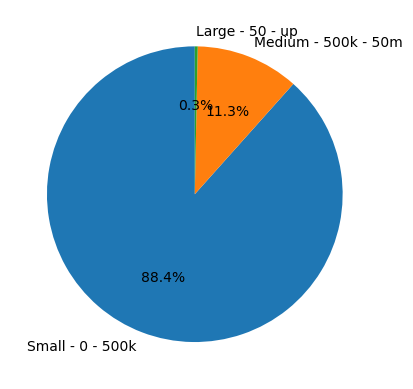

In [112]:
# make companies categories between 0 and 2.5 billion in assets
# small companies: 0 - 500 thousand
# medium companies: 500 thousand - 50 million
# large companies: 50 million - up 

df_small = df[df['activos'] < 500000]

df_medium = df[(df['activos'] >= 500000) & (df['activos'] < 50000000)]

df_large = df[(df['activos'] >= 50000000)]

# get the number of companies in each category and make a pie chart
sizes = [df_small.shape[0], df_medium.shape[0], df_large.shape[0]]

print('small:', df_small.shape[0])
print('medium:', df_medium.shape[0])
print('large:', df_large.shape[0])

plt.subplots()[1].pie(sizes, labels=[
    'Small - 0 - 500k', 'Medium - 500k - 50m', 'Large - 50 - up'],
        autopct='%1.1f%%', startangle=90)



In [123]:
# make an interactive bar chart of the companies
# melt small medium df 
small_melt = pd.melt(df_small, id_vars=['nombre'], value_vars=['activos'], var_name='activos', value_name='activos_value')

small_melt.head()
# make a distribution of the activos over the small companies
alt.Chart(small_melt).mark_bar().encode(
    alt.X('sum(acttivos):Q'),
    alt.Y('nombre:N')
).interactive()

ValueError: DataFusion error: Schema error: No field named acttivos. Valid fields are _vf_order, nombre, activos, activos_value.
    Context[0]: Failed to infer datatype of expression: Column(Column { relation: None, name: "acttivos" })
schema: DFSchema { fields: [DFField { qualifier: None, field: Field { name: "_vf_order", data_type: UInt64, nullable: true, dict_id: 0, dict_is_ordered: false, metadata: {} } }, DFField { qualifier: None, field: Field { name: "nombre", data_type: Utf8, nullable: true, dict_id: 0, dict_is_ordered: false, metadata: {} } }, DFField { qualifier: None, field: Field { name: "activos", data_type: Utf8, nullable: true, dict_id: 0, dict_is_ordered: false, metadata: {} } }, DFField { qualifier: None, field: Field { name: "activos_value", data_type: Float64, nullable: true, dict_id: 0, dict_is_ordered: false, metadata: {} } }], metadata: {}, functional_dependencies: FunctionalDependencies { deps: [] } }
    Context[1]: Failed to convert column Column(Column { relation: None, name: "acttivos" }) to numeric data type
    Context[2]: Failed to get node value


alt.Chart(...)

In [119]:
# make an interactive bar chart of the companies
# melt small medium df 
large_melt = pd.melt(df_large, id_vars=['nombre'], value_vars=['activos'], var_name='activos', value_name='activos_value')

alt.Chart(large_melt).mark_bar().encode(
    alt.X('nombre', type='nominal'),
    alt.Y('activos', type='quantitative'),
).interactive()

alt.Chart(...)

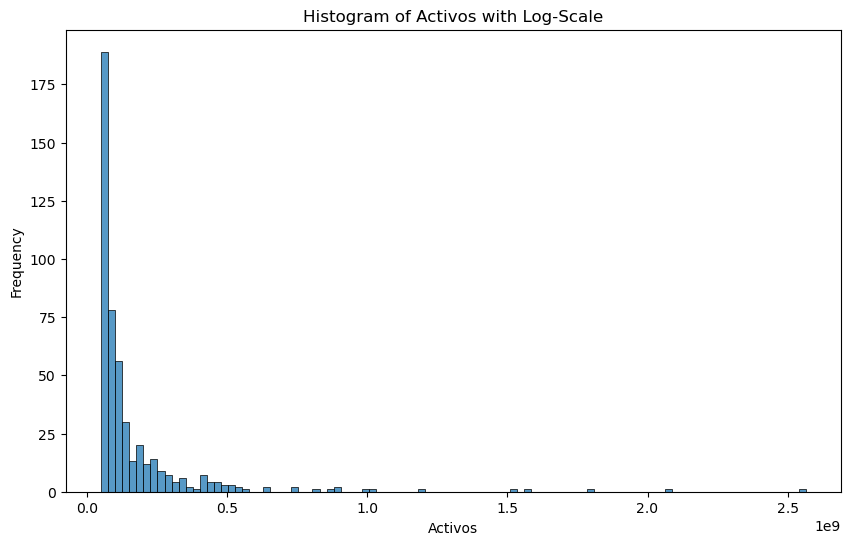

In [6]:
'''
# lets's get all the companies with activos of less than 5k
df_lower_5k = df[df['activos'] < 5000]

print(df_lower_5k['activos'].describe())

# let get the companies with activos of more than 5k
df_higher_5k = df[df['activos'] > 5000]

print(df_higher_5k['activos'].describe())

# let's get the top 10 companies with the highest activos
df_top_10 = df.nlargest(10, 'activos')
'''

# get the type of the activos column
#print(df['activos'].dtype)


#get he distribution of the activos ove the companies
#print(df['activos'].describe())

# transform the log of the activos

# make me scatter plot of all value of activos

#df['activos'].plot(kind='hist', logy=True, x='activos')
# Sample DataFrame

# Apply logarithmic transformation
#df['log_activos'] = np.log(df['activos'])

# take out all of the companies with activos of less than 1000
#df = df[df['activos'] > 10000]

# take away all the comanies with values less than 5k
df_lower = df[df['activos'] < 5000]
df_higher = df[df['activos'] >= 50000000]


# let classify the activos into categories
# 0 - k - small
# 100m - 1- medium
# 500m - 3b - large


# Plot the histogram with log scale
plt.figure(figsize=(10, 6))
sns.histplot(df_higher['activos'], bins=100)
plt.xlabel('Activos')
plt.ylabel('Frequency')
plt.title('Histogram of Activos with Log-Scale')

# add more ticks to the x-axis every 10k
#plt.xticks(np.arange(0, 500000, 10000))

# the labels of the x-axis are too close to each other
# so we can rotate them to make them more readable
#plt.xticks(rotation=50)

# Set the x-axis to log scale and adjust the ticks to show the original values
'''
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')
'''
plt.show()

# make a histogram of the activos with a log scale
# using plt instead of the pandas plot 

# Adding title and labels
#plt.title('Activos Distribution')
#plt.xlabel('Log-Activos')
#plt.ylabel('Frequency')

# Displaying the plot
#plt.show()


# get the companies with activos higher then 500k
#df_higher_500k = df[df['activos'] >= 500000]
#df_higher_500k = df_higher_500k.sort_values(by='activos', ascending=False)

# get the ones with lower then 500k
#df_lower_500k = df[df['activos'] < 500000]
#df_lower_500k = df_lower_500k.sort_values(by='activos', ascending=False)

#print('companies with higher than 500 activos: ', df_higher_500k.shape[0])
#print('companies with lower than 500 activos: ', df_lower_500k.shape[0])

In [35]:
# get the companies with activos higher then 1m
df_higher_500k = df[df['activos'] >= 500000]
df_higher_500k = df_higher_500k.sort_values(by='activos', ascending=False)

# get the ones with lower then 500k
df_lower_500k = df[df['activos'] < 500000]
df_lower_500k = df_lower_500k.sort_values(by='activos', ascending=False)

print('companies with higher than 500 activos: ', df_higher_500k.shape[0])
print('companies with lower than 500 activos: ', df_lower_500k.shape[0])

print(df_higher_500k['activos'].head(10))

companies with higher than 500 activos:  179114
companies with lower than 500 activos:  1228685
84860     2.564376e+09
1159      2.480404e+09
180778    2.343207e+09
297728    2.121860e+09
84861     2.070951e+09
356611    2.051462e+09
180779    1.880507e+09
84862     1.791278e+09
1160      1.776014e+09
180780    1.734747e+09
Name: activos, dtype: float64


In [ ]:

# Calculate the 95th percentile
percentile_95 = df['activos'].quantile(0.95)

# Filter the DataFrame to include only companies with assets greater than the 95th percentile
extremely_high_companies = df[df['activos'] > percentile_95]

print(extremely_high_companies.shape[0])
extremely_high_companies.describe()



7662


,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
count,7662.0,7662.000000,7662.000000,7662.000000,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,...,7662.000000,7662.000000,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03
mean,2023.0,218691.099321,4295.330332,0.033020,2.285546e+06,1.601980e+07,1.864717e+07,8.495556e+06,1.426160e+10,2.828162e+05,...,0.052764,0.753867,3.495348e+05,3.511158e+06,1.381019e+05,5.523900e+04,1.082594e+07,1.077479e+06,1.005899e+05,4.056942e+06
std,0.0,246485.290229,3412.371218,0.178701,3.562453e+04,6.762746e+07,7.111579e+07,4.455521e+07,1.248264e+12,2.150152e+06,...,0.123588,27.140038,2.049224e+06,1.636260e+07,1.894322e+06,1.308748e+06,5.038905e+07,5.631379e+06,1.539312e+06,1.772721e+07
min,2023.0,2.000000,1.000000,0.000000,2.195241e+06,0.000000e+00,2.217079e+06,-1.081295e+08,-4.774427e+07,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2023.0,53385.000000,1923.250000,0.000000,2.258964e+06,8.385161e+05,3.340332e+06,7.467526e+05,0.000000e+00,0.000000e+00,...,0.000000,0.000000,1.212418e+03,2.195758e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.105382e+05
50%,2023.0,125455.500000,3931.500000,0.000000,2.291016e+06,3.672277e+06,5.533602e+06,2.089435e+06,5.715294e+04,2.359842e+04,...,0.020000,0.100000,3.989626e+04,7.908292e+05,9.864180e+03,0.000000e+00,1.678500e+06,6.511150e+02,0.000000e+00,9.807263e+05
75%,2023.0,201152.500000,6211.750000,0.000000,2.312730e+06,1.020237e+07,1.249369e+07,5.208771e+06,4.094029e+05,1.186955e+05,...,0.060000,0.400000,1.785361e+05,2.243500e+06,6.219685e+04,0.000000e+00,6.428412e+06,3.809024e+05,0.000000e+00,2.605097e+06
max,2023.0,753967.000000,120431.000000,1.000000,2.345498e+06,2.483015e+09,2.564376e+09,1.785967e+09,1.092641e+14,9.341411e+07,...,4.740000,2358.760000,1.217090e+08,6.604890e+08,1.315138e+08,7.274641e+07,1.817218e+09,1.534114e+08,6.472873e+07,7.007793e+08


In [7]:
from vega_datasets import data

source = data.movies.url

alt.Chart(source).mark_bar().encode(
    alt.X("IMDB_Rating:Q").bin(),
    y='count()',
).interactive()


alt.Chart(...)